In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import renom as rm
from renom.optimizer import Sgd

In [60]:
iris = load_iris()
data = iris.data
label = iris.target

print("data shape:{}".format(data.shape))
print(type(data))
pd.DataFrame(data, columns=iris.feature_names)
# print(data)

# 各データの分類 (0: 'setosa', 1: 'versicolor', 2: 'virginica')
print("label shape:{}".format(label.shape))
print(type(label))
print(label)

print(type(iris))
# print(iris)

data shape:(150, 4)
<class 'numpy.ndarray'>
label shape:(150,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'sklearn.utils.Bunch'>


In [61]:
iris.target_names
# print(type(iris.target_names))

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [62]:
model = rm.Sequential([
    rm.Dense(20),
    rm.Relu(),
    rm.Dense(3)
])
print(model)
print(model)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3)
print("X_train:{}, X_test:{}, y_train:{}, y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

# print(X_train)
# print(X_test)
print(y_train)
print(y_train[4])
print(type(y_train))
# print(y_test)
print()

# なんでこの処理が必要なのだろうか
# -> 横ベクトル（1次元配列）ではなく、縦ベクトルにしないと後続の
# softmax_cross_entropy.py in __new__(cls, lhs, rhs)
# がコケるから
y_train = y_train.reshape(len(X_train), -1)
y_test = y_test.reshape(len(X_test), -1)

print(len(X_train))
print(len(X_test))

print(y_train)
# print(y_test)
print()

print("X_train:{}, X_test:{}, y_train:{}, y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train:(105, 4), X_test:(45, 4), y_train:(105,), y_test:(45,)
[2 0 0 0 0 1 0 1 1 1 1 0 0 2 2 1 2 1 1 2 0 1 2 1 2 1 2 2 0 2 0 1 1 0 0 0 2
 2 2 0 1 2 2 0 2 0 1 1 2 2 0 0 2 0 1 0 2 1 2 2 2 0 1 1 2 0 1 2 2 0 1 1 0 2
 1 2 2 1 2 0 1 2 1 2 0 0 0 2 2 2 1 0 0 1 2 0 2 0 2 1 2 0 2 1 0]
0
<class 'numpy.ndarray'>

105
45
[[2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [1]
 [2]
 [2]
 [0]
 [0]
 [2]
 [0]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [0]
 [2]
 [2]
 [2]
 [1]
 [0]
 [0]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [0]]

X_train:(105, 4), X_test:(45, 4), y_train:(105, 1), y_test:(45, 1)


In [64]:
batch_size = 8
epoch = 10
N = len(X_train)
optimizer = Sgd(lr=0.001)
learning_curve = []
test_learning_curve = []

# epoch数分ミニバッチで学習（損失関数にて、モデルの評価まで）を行う
for i in range(epoch):
    perm = np.random.permutation(N)   # N = 150 データの総数 150つ（1-150）のランダム数値の配列
    # print("perm = \n {}".format(perm))
    loss = 0
    
    # ミニバッチの数だけ重みパラメータの勾配を求め、パラメータを更新する
    for j in range(0, N // batch_size):
        # 訓練用のミニバッチ、つまりデータ
        train_batch = X_train[perm[j*batch_size : (j+1)*batch_size]]   # 4 * 8
        # 訓練用のミニバッチに対応したlabel、つまり答え
        response_batch = y_train[perm[j*batch_size : (j+1)*batch_size]]   # 1 * 8
        # print("loop{}: \n train_batch = \n {}, \n response_batch = \n {}".format(j, train_batch, response_batch))

        # モデルの学習？内部では何をしているのだろうか
        with model.train():
            # データと答えを渡してこのモデルの損失関数の値を求める
            # print(model)
            l = rm.softmax_cross_entropy(model(train_batch), response_batch)
        # print("I:{}".format(l))
#         print(type(l))
        # 逆伝搬を実行
        grad = l.grad()
        #  print("grad:{}".format(grad))
        # 損失関数を元に微小量だけ更新する
        grad.update(optimizer)
        # print("I:{}".format(l))
#         print(type(loss))
        # 今回のepochでの損失関数の値を蓄積させる（appendしている）
        loss += l.as_ndarray()
        # 配列とfloatの足し算、、、pythonの書き方がわからない
#         print(type(l.as_ndarray()))
#         print(l.as_ndarray())
#         print(type(loss))
        # print("loss:{} \n".format(loss))
        
    # 訓練用データの損失関数の値を求める
    train_loss = loss / (N // batch_size)

    test_loss = rm.softmax_cross_entropy(model(X_test), y_test).as_ndarray()
    # グラフ描画用
    test_learning_curve.append(test_loss)
    # グラフ描画用
    learning_curve.append(train_loss)
    print("epoch:{:03d}, train_loss:{:.4f}, test_loss:{:.4f}".format(i, float(train_loss), float(test_loss)))
    
#     print("train_loss:{}, test_loss:{}".format(train_loss, test_loss))
#     print(type(train_loss))

epoch:000, train_loss:8.3874, test_loss:6.3233
epoch:001, train_loss:7.6764, test_loss:5.7640
epoch:002, train_loss:6.9675, test_loss:5.0360
epoch:003, train_loss:5.7688, test_loss:3.8524
epoch:004, train_loss:4.1402, test_loss:2.9447
epoch:005, train_loss:3.6350, test_loss:2.9259
epoch:006, train_loss:3.5875, test_loss:2.9387
epoch:007, train_loss:3.6236, test_loss:2.9170
epoch:008, train_loss:3.5513, test_loss:2.9220
epoch:009, train_loss:3.5861, test_loss:2.9763


[2 0 2 2 1 2 1 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 0 2 2 1 1 1 1 2 2 2 2 1 1 2
 1 2 1 2 2 2 2 1]
[[ 0 16  0]
 [ 0  0 19]
 [ 2  0  8]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        16
          1       0.00      0.00      0.00        19
          2       0.30      0.80      0.43        10

avg / total       0.07      0.18      0.10        45



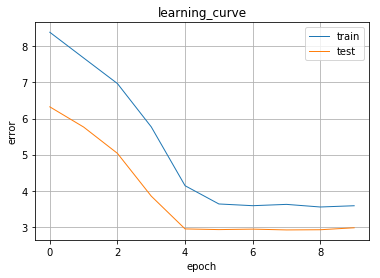

In [65]:
predictions = np.argmax(model(X_test).as_ndarray(), axis=1)
print(predictions)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

plt.plot(learning_curve, linewidth=1, label="train")
plt.plot(test_learning_curve, linewidth=1, label="test")
plt.title("learning_curve")
plt.ylabel("error")
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.show()